In [1]:
import numpy as np
import pandas as pd                               
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [2]:
#Path of dataset
folder1=r"C:\Users\rugve\edi_sem5_new_2class\Activity Recognition Dataset\Chit chat"
# folder2=r"C:\Users\rugve\edi_sem5\Activity Recognition Dataset\Recreation"
folder3=r"C:\Users\rugve\edi_sem5_new_2class\Activity Recognition Dataset\Studying"

In [4]:
#Applying FAST + BRIEF Feature descriptor on folder1
i=0
k=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    k=k+1
#     if k==320:
#       break
  
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder1.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (187, 32)
descriptor shape  1  :  (176, 32)
descriptor shape  2  :  (133, 32)
descriptor shape  3  :  (120, 32)
descriptor shape  4  :  (230, 32)
descriptor shape  5  :  (95, 32)
descriptor shape  6  :  (121, 32)
descriptor shape  7  :  (70, 32)
descriptor shape  8  :  (59, 32)
descriptor shape  9  :  (221, 32)
descriptor shape  10  :  (231, 32)
descriptor shape  11  :  (123, 32)
descriptor shape  12  :  (174, 32)
descriptor shape  13  :  (76, 32)
descriptor shape  14  :  (137, 32)
descriptor shape  15  :  (93, 32)
descriptor shape  16  :  (90, 32)
descriptor shape  17  :  (83, 32)
descriptor shape  18  :  (155, 32)
descriptor shape  19  :  (260, 32)
descriptor shape  20  :  (135, 32)
descriptor shape  21  :  (124, 32)
descriptor shape  22  :  (190, 32)
descriptor shape  23  :  (237, 32)
descriptor shape  24  :  (111, 32)
descriptor shape  25  :  (231, 32)
descriptor shape  26  :  (92, 32)
descriptor shape  27  :  (136, 32)
descriptor shape  28  :  (114, 32)
des

descriptor shape  242  :  (61, 32)
descriptor shape  243  :  (340, 32)
descriptor shape  244  :  (86, 32)
descriptor shape  245  :  (191, 32)
descriptor shape  246  :  (220, 32)
descriptor shape  247  :  (281, 32)
descriptor shape  248  :  (177, 32)
descriptor shape  249  :  (148, 32)
descriptor shape  250  :  (159, 32)
descriptor shape  251  :  (137, 32)
descriptor shape  252  :  (136, 32)
descriptor shape  253  :  (323, 32)
descriptor shape  254  :  (220, 32)
descriptor shape  255  :  (164, 32)
descriptor shape  256  :  (130, 32)
descriptor shape  257  :  (139, 32)
descriptor shape  258  :  (67, 32)
descriptor shape  259  :  (335, 32)
descriptor shape  260  :  (140, 32)
descriptor shape  261  :  (148, 32)
descriptor shape  262  :  (127, 32)
descriptor shape  263  :  (192, 32)
descriptor shape  264  :  (242, 32)
descriptor shape  265  :  (47, 32)
descriptor shape  266  :  (124, 32)
descriptor shape  267  :  (259, 32)
descriptor shape  268  :  (77, 32)
descriptor shape  269  :  (118, 3

In [5]:
#reading previously saved feature descriptor csv file of folder1 and save it into a dataframe
data1 = pd.read_csv('folder1.csv',header=None,dtype='uint8')

data1=data1.astype(np.uint8) 
data1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,8,6,0,36,1,1,128,68,0,0,...,8,32,201,16,32,83,40,0,12,34
1,24,7,12,252,45,59,165,205,16,130,...,203,40,205,216,164,123,248,77,76,119
2,24,7,76,252,47,51,228,205,17,131,...,201,40,205,216,164,123,248,108,68,247
3,24,7,4,253,45,59,196,205,17,130,...,200,40,201,208,36,123,248,72,76,247
4,24,5,76,220,44,187,165,201,20,138,...,203,40,205,216,164,106,248,77,76,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57616,176,116,111,109,5,96,66,16,178,227,...,197,141,28,238,231,58,238,220,68,13
57617,31,157,176,84,225,217,59,112,205,16,...,63,39,243,39,177,134,12,55,61,136
57618,31,5,176,196,176,153,63,236,237,80,...,254,34,240,191,181,194,60,119,60,168
57619,88,4,108,255,62,51,244,73,19,183,...,200,58,220,208,165,106,170,108,64,247


In [6]:
#Applying FAST + BRIEF Feature descriptor on folder2
i=0
k=0
for filename in os.listdir(folder3):
    
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    try:
      img=cv2.resize(a,resize)
    except:
      continue
      
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    k=k+1
#     if k==320:
#       break
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder3.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (84, 32)
descriptor shape  1  :  (70, 32)
descriptor shape  2  :  (54, 32)
descriptor shape  3  :  (34, 32)
descriptor shape  4  :  (63, 32)
descriptor shape  5  :  (71, 32)
descriptor shape  6  :  (70, 32)
descriptor shape  7  :  (271, 32)
descriptor shape  8  :  (120, 32)
descriptor shape  9  :  (109, 32)
descriptor shape  10  :  (83, 32)
descriptor shape  11  :  (147, 32)
descriptor shape  12  :  (91, 32)
descriptor shape  13  :  (95, 32)
descriptor shape  14  :  (119, 32)
descriptor shape  15  :  (56, 32)
descriptor shape  16  :  (94, 32)
descriptor shape  17  :  (96, 32)
descriptor shape  18  :  (278, 32)
descriptor shape  19  :  (141, 32)
descriptor shape  20  :  (59, 32)
descriptor shape  21  :  (98, 32)
descriptor shape  22  :  (193, 32)
descriptor shape  23  :  (127, 32)
descriptor shape  24  :  (81, 32)
descriptor shape  25  :  (62, 32)
descriptor shape  26  :  (229, 32)
descriptor shape  27  :  (81, 32)
descriptor shape  28  :  (49, 32)
descriptor sha

descriptor shape  243  :  (56, 32)
descriptor shape  244  :  (138, 32)
descriptor shape  245  :  (75, 32)
descriptor shape  246  :  (102, 32)
descriptor shape  247  :  (75, 32)
descriptor shape  248  :  (89, 32)
descriptor shape  249  :  (94, 32)
descriptor shape  250  :  (64, 32)
descriptor shape  251  :  (116, 32)
descriptor shape  252  :  (80, 32)
descriptor shape  253  :  (91, 32)
descriptor shape  254  :  (127, 32)
descriptor shape  255  :  (133, 32)
descriptor shape  256  :  (62, 32)
descriptor shape  257  :  (116, 32)
descriptor shape  258  :  (56, 32)
descriptor shape  259  :  (133, 32)
descriptor shape  260  :  (68, 32)
descriptor shape  261  :  (104, 32)
descriptor shape  262  :  (140, 32)
descriptor shape  263  :  (155, 32)
descriptor shape  264  :  (62, 32)
descriptor shape  265  :  (62, 32)
descriptor shape  266  :  (49, 32)
descriptor shape  267  :  (68, 32)
descriptor shape  268  :  (177, 32)
descriptor shape  269  :  (160, 32)
descriptor shape  270  :  (181, 32)
descrip

In [7]:
#reading previously saved feature descriptor csv file of folder2 and save it into a dataframe
data3= pd.read_csv('folder3.csv',header=None,dtype='uint8')
data3=data3.astype(np.uint8)
data3

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,8,6,14,60,15,50,94,76,17,227,...,192,44,13,152,160,123,168,40,64,213
1,169,168,6,187,23,50,94,37,25,227,...,128,61,13,41,166,57,100,56,226,215
2,40,196,71,191,23,50,78,33,25,227,...,192,125,12,41,134,59,108,56,226,215
3,40,200,71,185,22,50,78,33,25,227,...,192,253,12,41,134,57,100,56,226,199
4,79,216,212,155,23,22,86,39,137,233,...,48,95,68,35,142,8,64,48,227,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47269,78,232,197,163,215,22,94,99,73,165,...,0,95,14,35,90,29,64,168,115,210
47270,96,93,3,22,201,79,161,234,116,50,...,62,98,171,227,90,181,19,247,175,49
47271,39,31,179,64,232,24,163,254,124,116,...,183,65,187,250,145,21,31,199,60,12
47272,228,248,159,139,212,236,206,35,252,172,...,16,223,6,33,90,45,71,161,243,6


In [107]:
#append all the class wise feature descriptor data into one data frame
dataA=data1.append(data2)

dataA

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,8,6,0,36,1,1,128,68,0,0,...,8,32,201,16,32,83,40,0,12,34
1,24,7,12,252,45,59,165,205,16,130,...,203,40,205,216,164,123,248,77,76,119
2,24,7,76,252,47,51,228,205,17,131,...,201,40,205,216,164,123,248,108,68,247
3,24,7,4,253,45,59,196,205,17,130,...,200,40,201,208,36,123,248,72,76,247
4,24,5,76,220,44,187,165,201,20,138,...,203,40,205,216,164,106,248,77,76,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38005,224,126,79,58,15,54,214,42,25,227,...,0,60,12,201,202,57,133,56,226,213
38006,104,106,79,62,23,54,214,40,25,231,...,0,60,12,1,170,57,6,56,226,213
38007,72,136,68,60,19,22,94,32,9,193,...,0,45,12,33,136,27,12,40,162,208
38008,0,128,68,60,19,18,30,32,9,129,...,0,45,13,33,136,19,12,32,162,208


In [8]:
data=data1.append(data3)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,8,6,0,36,1,1,128,68,0,0,...,8,32,201,16,32,83,40,0,12,34
1,24,7,12,252,45,59,165,205,16,130,...,203,40,205,216,164,123,248,77,76,119
2,24,7,76,252,47,51,228,205,17,131,...,201,40,205,216,164,123,248,108,68,247
3,24,7,4,253,45,59,196,205,17,130,...,200,40,201,208,36,123,248,72,76,247
4,24,5,76,220,44,187,165,201,20,138,...,203,40,205,216,164,106,248,77,76,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47269,78,232,197,163,215,22,94,99,73,165,...,0,95,14,35,90,29,64,168,115,210
47270,96,93,3,22,201,79,161,234,116,50,...,62,98,171,227,90,181,19,247,175,49
47271,39,31,179,64,232,24,163,254,124,116,...,183,65,187,250,145,21,31,199,60,12
47272,228,248,159,139,212,236,206,35,252,172,...,16,223,6,33,90,45,71,161,243,6


In [9]:
#save appended data into a csv file
csv_data=data.to_csv('finalData.csv', mode='a', header=False,index=False)

In [10]:
#read the data from the previously saved csv file
data = pd.read_csv('finalData.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,8,6,0,36,1,1,128,68,0,0,...,8,32,201,16,32,83,40,0,12,34
1,24,7,12,252,45,59,165,205,16,130,...,203,40,205,216,164,123,248,77,76,119
2,24,7,76,252,47,51,228,205,17,131,...,201,40,205,216,164,123,248,108,68,247
3,24,7,4,253,45,59,196,205,17,130,...,200,40,201,208,36,123,248,72,76,247
4,24,5,76,220,44,187,165,201,20,138,...,203,40,205,216,164,106,248,77,76,247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104890,78,232,197,163,215,22,94,99,73,165,...,0,95,14,35,90,29,64,168,115,210
104891,96,93,3,22,201,79,161,234,116,50,...,62,98,171,227,90,181,19,247,175,49
104892,39,31,179,64,232,24,163,254,124,116,...,183,65,187,250,145,21,31,199,60,12
104893,228,248,159,139,212,236,206,35,252,172,...,16,223,6,33,90,45,71,161,243,6


In [11]:
#Applying Kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [12]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [13]:
#calculate histogram of trained kmeans
hist = np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5])

print("Histogram of trained kmeans")
print(hist, "\n")

Histogram of trained kmeans
(array([19020, 18039, 23338, 22082, 22416], dtype=int64), array([0, 1, 2, 3, 4, 5])) 



In [14]:
#performing kmeans prediction on the folder1 with the pretrained kmeans model

#initialising i=0; as it is the first class
i=0
data=[]
k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
    #append the dataframe into the array 
    data.append(hist[0])
    k=k+1
#     if k==320:
#         break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder1.csv', mode='a',header=False,index=False)

In [15]:
#performing kmeans prediction on the folder3 with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=2
data=[]
k=0
for filename in os.listdir(folder3):
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(500,500)
    try:
      img=cv2.resize(a,resize)
    except:
      continue
      
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    #append the dataframe into the array 
    data.append(hist[0])
    k=k+1
#     if k==320:
#         break;
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder3.csv', mode='a',header=False,index=False)

In [16]:
#Displaying the kmeans predicted data of folder1
print("chitchat")
dat1= pd.read_csv('finalFolder1.csv',header=None)
print(dat1)

chitchat
      0   1   2   3   4  5
0    41  41  31  28  46  0
1    25  26  52  39  34  0
2    42  39  11  21  20  0
3    29  19  19  29  24  0
4    41  21  68  40  60  0
..   ..  ..  ..  ..  .. ..
324  43  44  57  39  49  0
325  28  24  30  26  34  0
326  25  21  37  50  30  0
327  44  59  57  46  71  0
328  59  56  93  78  95  0

[329 rows x 6 columns]


In [118]:
#Displaying the kmeans predicted data of folder2
print("recreation")
dat2= pd.read_csv('finalFolder2.csv',header=None)
print(dat2)

recreation
      0   1   2   3   4  5
0    36  23  16   8  22  1
1    17  11  13   4   8  1
2    13  15   8  10   5  1
3    10   9  20   9  24  1
4     8  15  21  13  18  1
..   ..  ..  ..  ..  .. ..
315  13  15   9  27  15  1
316  18  21   6  33  14  1
317  25  20  26  27  28  1
318   3  13  24  19  28  1
319  15  29  27  34  17  1

[320 rows x 6 columns]


In [17]:
#Displaying the kmeans predicted data of folder2
print("studying")
dat3= pd.read_csv('finalFolder3.csv',header=None)
print(dat3)

studying
      0   1   2   3   4  5
0     9  14  22  25  14  2
1     7  13  14  15  21  2
2     4  15  14  10  11  2
3     3   2   9   7  13  2
4    14   4  25   6  14  2
..   ..  ..  ..  ..  .. ..
393   7   3  10  10  15  2
394  25  14  33  26  71  2
395  24  17  27  54  25  2
396   8   9  16  12   3  2
397  13  21  17  27  27  2

[398 rows x 6 columns]


In [120]:
#appending All kmeans predicted data into 1 dataframe
B = dat1.append(dat2)
B

,0,1,2,3,4,5
0,31,46,39,44,27,0
1,53,35,25,23,40,0
2,11,19,39,45,19,0
3,20,23,21,28,28,0
4,66,62,19,41,42,0
...,...,...,...,...,...,...
315,13,15,9,27,15,1
316,18,21,6,33,14,1
317,25,20,26,27,28,1
318,3,13,24,19,28,1


In [18]:
A = dat1.append(dat3)

In [19]:
A

,0,1,2,3,4,5
0,41,41,31,28,46,0
1,25,26,52,39,34,0
2,42,39,11,21,20,0
3,29,19,19,29,24,0
4,41,21,68,40,60,0
...,...,...,...,...,...,...
393,7,3,10,10,15,2
394,25,14,33,26,71,2
395,24,17,27,54,25,2
396,8,9,16,12,3,2


In [20]:
A[5].value_counts()


2    398
0    329
Name: 5, dtype: int64

In [21]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalF.csv', mode='a',header=False,index=False)

In [22]:
#read the data from the previously saved csv file
A = pd.read_csv("FinalF.csv",header=None)
A

,0,1,2,3,4,5
0,41,41,31,28,46,0
1,25,26,52,39,34,0
2,42,39,11,21,20,0
3,29,19,19,29,24,0
4,41,21,68,40,60,0
...,...,...,...,...,...,...
722,7,3,10,10,15,2
723,25,14,33,26,71,2
724,24,17,27,54,25,2
725,8,9,16,12,3,2


In [23]:
df=A

In [24]:
df

,0,1,2,3,4,5
0,41,41,31,28,46,0
1,25,26,52,39,34,0
2,42,39,11,21,20,0
3,29,19,19,29,24,0
4,41,21,68,40,60,0
...,...,...,...,...,...,...
722,7,3,10,10,15,2
723,25,14,33,26,71,2
724,24,17,27,54,25,2
725,8,9,16,12,3,2


In [25]:
rows,columns=df.shape

In [26]:
df.shape

(727, 6)

In [27]:
df.head()

,0,1,2,3,4,5
0,41,41,31,28,46,0
1,25,26,52,39,34,0
2,42,39,11,21,20,0
3,29,19,19,29,24,0
4,41,21,68,40,60,0


In [28]:
df.tail()

,0,1,2,3,4,5
722,7,3,10,10,15,2
723,25,14,33,26,71,2
724,24,17,27,54,25,2
725,8,9,16,12,3,2
726,13,21,17,27,27,2


In [29]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [30]:
# statistical measures about the data
df.describe()

,0,1,2,3,4,5
count,727.000000,727.00000,727.000000,727.000000,727.000000,727.000000
mean,26.162311,24.81293,32.101788,30.374140,30.833563,1.094911
std,16.647738,15.69600,19.014945,17.867134,18.854191,0.996171
min,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,14.000000,14.00000,18.000000,17.000000,17.000000,0.000000
50%,23.000000,22.00000,28.000000,27.000000,26.000000,2.000000
75%,35.000000,33.00000,44.000000,41.000000,39.500000,2.000000
max,101.000000,140.00000,105.000000,131.000000,131.000000,2.000000


In [ ]:
# import seaborn as sns
# ax=sns.countplot(x=2,data=df)

# df[2].value_counts()

In [ ]:
# target=2

In [31]:
X = df.drop(columns=5, axis=1)
Y = df[5]

In [32]:
X

,0,1,2,3,4
0,41,41,31,28,46
1,25,26,52,39,34
2,42,39,11,21,20
3,29,19,19,29,24
4,41,21,68,40,60
...,...,...,...,...,...
722,7,3,10,10,15
723,25,14,33,26,71
724,24,17,27,54,25
725,8,9,16,12,3


In [33]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
722    2
723    2
724    2
725    2
726    2
Name: 5, Length: 727, dtype: int64

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.3, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (508, 5)
Number transactions y_train dataset:  (508,)
Number transactions X_test dataset:  (219, 5)
Number transactions y_test dataset:  (219,)


In [35]:
print(X.shape) 
print(X_train.shape)
print(X_test.shape)

(727, 5)
(508, 5)
(219, 5)


In [36]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
modelSVM=SVC(kernel='linear')
modelSVM.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelSVM, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))   

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


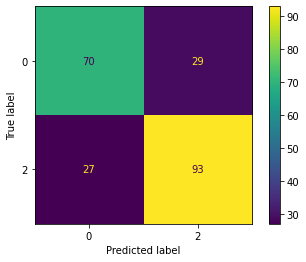

Accuracy on Train data :  0.7244094488188977
Accuracy on Test data :  0.7442922374429224


In [37]:
modelSVM=SVC(kernel='rbf')
modelSVM.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelSVM, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))  

In [38]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import joblib


In [46]:
# !pip install yellowbrick

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [51]:
!pip3 install scikit-learn

In [39]:
from yellowbrick.classifier import ROCAUC
def plot_ROC_curve(model, x_train, x_test, y_train, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 'chitchat', 
                                        1: 'recreation', 
                                        2: 'studying'})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

In [40]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 50)
# plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show()
model_rf.fit(X_train, Y_train)
joblib.dump(model_rf,"model_rf")

y_pred2 = model_rf.predict(X_test)
print("Random Forest Clasifier")
print("Train Accuracy:",model_rf.score(X_train, Y_train))
print("Test Accuracy:",model_rf.score(X_test, Y_test))
print("Precision Score: ",metrics.precision_score(Y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(Y_test, y_pred2, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(Y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred2,))
print(plot_ROC_curve(model_rf,X_train, X_test, Y_train, Y_test))

Random Forest Clasifier
Train Accuracy: 1.0
Test Accuracy: 0.7351598173515982
Precision Score:  0.7351598173515982
Recall Score:  0.7351598173515982
F1 Score:  0.7351598173515982
Confusion Matrix: 
[[71 28]
 [30 90]]


C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


ValueError: y_true takes value in {0, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [41]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_dt = DecisionTreeClassifier(max_depth=13)
joblib.dump(model_dt,"model_dt")
#training the model with the Training Variables 
model_dt.fit(X_train, Y_train)
#joblib.dump(model_dt,"model_dt")
#predicting the traget variable using testing variables
y_pred1 = model_dt.predict(X_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(Y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(X_train, Y_train))
print("Test Accuracy:",model_dt.score(X_test, Y_test))
print("Precision Score: ",metrics.precision_score(Y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(Y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(Y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(Y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(Y_test, y_pred1))
print(plot_ROC_curve(model_dt,X_train, X_test, Y_train, Y_test))

Decision Tree Results
Decision Tree Accuracy:  63.013698630136986 %
Train Accuracy: 0.9763779527559056
Test Accuracy: 0.6301369863013698
Precision Score:  0.6301369863013698
Recall Score:  0.6301369863013698
F2 Score:  0.6301369863013698
F1 Score:  0.6301369863013698
Confusion Matrix: 
[[61 38]
 [43 77]]


C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro

ValueError: y_true takes value in {0, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, Y_train)
#joblib.dump(model_knn,"model_knn")
y_pred3 = model_knn.predict(X_test)
print("KNN")
print("Train Accuracy:",model_knn.score(X_train, Y_train))
print("Test Accuracy:",model_knn.score(X_test, Y_test))
print("Precision Score: ",metrics.precision_score(Y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(Y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(Y_test, y_pred3, pos_label='positive', average='micro'))
print(plot_ROC_curve(model_knn,X_train, X_test, Y_train, Y_test))

KNN
Train Accuracy: 0.7933070866141733
Test Accuracy: 0.6529680365296804
Precision Score:  0.6529680365296804
Recall Score:  0.6529680365296804
F1 Score:  0.6529680365296804


C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


ValueError: y_true takes value in {0, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


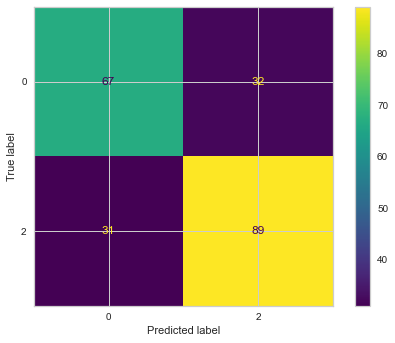

Accuracy on Train data :  1.0
Accuracy on Test data :  0.7123287671232876


In [43]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))

## produce a ROC plot ##
#obtain prediction probabilities
# y_prob = modelRF.predict_proba(X_test)
# #calculate false & true positive rates
# fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
# #construct plot
# plt.plot(fpr,tpr)
# plt.title('Receiver Operating Characteristic')
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [44]:
#knn
modelknn=KNeighborsClassifier()
modelknn.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = modelknn.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the knn')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# Accuracy on test data
X_test_prediction = modelknn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))


Results obtained for the knn

Results obtained on Training Data
Accuracy on Train data :  0.7933070866141733

Results obtained on Testing Data
Accuracy on Test data :  0.6529680365296804
